<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB11_CLASS_FRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
# 데이터셋 생성
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
df = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
# X AND Y SPLIT
y = df['PRICE']
x = df.drop(['PRICE'], axis=1)

In [42]:
# TRAIN AND TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

[4.61308766 1.51911841 2.16567835 1.1173208  2.49816938 2.40419062
 2.25886839 1.45062305 1.73231015 2.02634729 1.54262538 1.89066594
 4.82894157]


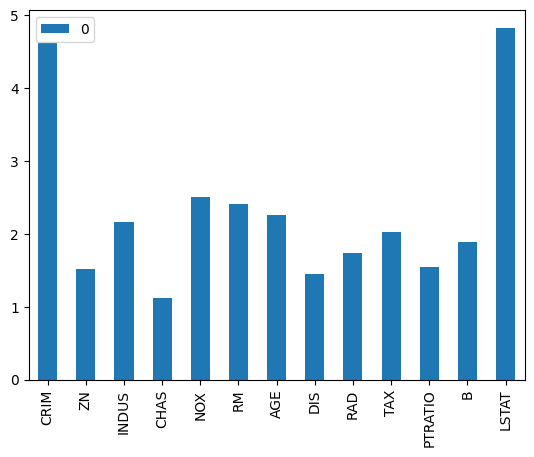

In [29]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest, f_classif
test = SelectKBest(score_func=f_classif, k=4) #변수추출
fit = test.fit(x_train, y_train)
print(fit.scores_) # 점수가 높은 변수를 선택
score_df = pd.DataFrame(fit.scores_, index=x_train.columns)
score_df.plot(kind='bar')
plt.show()

In [30]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
fit = pca.fit(x_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_) #설명력
print(fit.components_.T) #로테이션 행렬
print(pca.transform(x_train)) # 줄어든 변수

Explained Variance: [0.80082761 0.16675598 0.02243715]
[[ 3.01453467e-02 -3.37601129e-03  1.45635520e-02]
 [-4.14085468e-02  3.55085824e-03 -6.22618700e-01]
 [ 2.82080207e-02  3.66926555e-03  9.24018371e-02]
 [ 2.93474682e-06  1.66367731e-04  8.28396343e-04]
 [ 4.50491469e-04  5.80054786e-06  1.89692316e-03]
 [-1.14163044e-03 -4.65380528e-04 -4.02408362e-03]
 [ 7.88794588e-02  1.71517437e-03  7.64831712e-01]
 [-6.60587928e-03 -2.35832469e-04 -4.69253843e-02]
 [ 4.50307779e-02  9.84853829e-03  1.33277927e-03]
 [ 9.47952662e-01  3.00025791e-01 -8.76344880e-02]
 [ 5.63838715e-03  2.48964303e-03  1.15615139e-02]
 [-2.98554412e-01  9.53848299e-01  2.84922213e-02]
 [ 2.24774725e-02 -3.74749704e-03  8.81968561e-02]]
[[ 254.61628502   72.21140567    8.08361011]
 [-104.68934169    8.32060058    6.94174721]
 [-101.90209261  -24.38564148  -41.3403782 ]
 ...
 [-134.6095185    -4.02837404  -62.15663259]
 [ 325.79097519 -156.34532736   -1.01614746]
 [  67.6630467  -278.3523028    13.34774823]]


Num Features: 3
Selected Features: [False False False  True  True  True False False False False False False
 False]
Feature Ranking: [ 5  8  7  1  1  1 11  3  6 10  2  9  4]


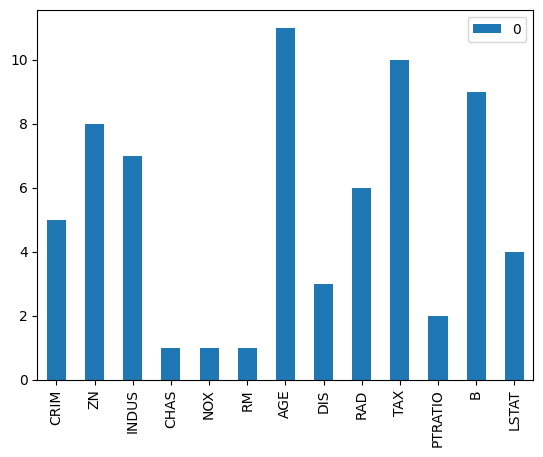

In [44]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model,n_features_to_select=3)
fit = rfe.fit(x_train, y_train)
print("Num Features: %d" % fit.n_features_) #변수의 갯수
print("Selected Features: %s" % fit.support_) #선택된 변수, 참거짓값
print("Feature Ranking: %s" % fit.ranking_) #변수의 순위
score_df = pd.DataFrame(fit.ranking_, index=x_train.columns)
score_df.plot(kind='bar')
plt.show()

[0.04209244 0.00195648 0.00829672 0.00145937 0.01682556 0.37744544
 0.01756107 0.03700406 0.00945545 0.01237804 0.01465627 0.01263238
 0.44823672]


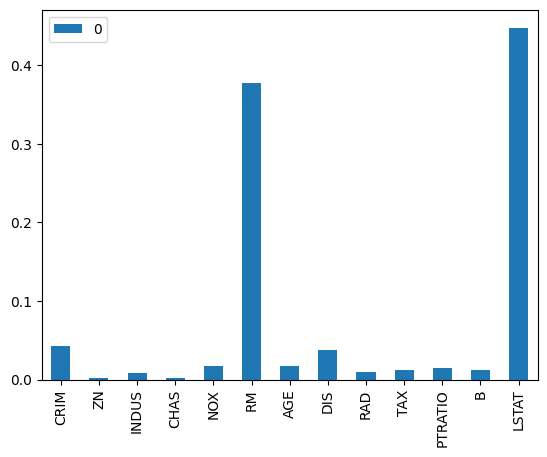

In [47]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10) #나무갯수
model.fit(x_train, y_train)
print(model.feature_importances_) #중요도 점수가 높은 변수선택
score_df = pd.DataFrame(model.feature_importances_, index=x_train.columns)
score_df.plot(kind='bar')
plt.show()